In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 12)

Populating the interactive namespace from numpy and matplotlib


In [ ]:
grid = 5
print(len(np.linspace(0, 10, 5)))

In [ ]:
#HW 6 Problem 2

#Steady State Equation
maximum = 1000
c_val = 0
for c in np.linspace(3700,3800,100):
    a= 5.
    l= 0.5
    t_0= 20.
    x=np.linspace(0,l,100)
    k = 1.28
    t_ss=-(c*np.exp(-a*x)/((a**2)*k))+(x/l)*(t_0 - (c*(1-np.exp(-a*l)))/((a**2)*k))+(c/((a**2)*k))
    diff = abs(40+273-max(t_ss))
    plt.plot(x, t_ss, label=str(c))
    if diff < maximum:
        maximum = diff
        c_val = c
print('The c constant that makes the maximum temperature closest to 40C (313K) is:')
print(c_val)
c = c_val
t_ss=-(c*np.exp(-a*x)/((a**2)*k))+(x/l)*(t_0 - (c*(1-np.exp(-a*l)))/((a**2)*k))+(c/((a**2)*k)) 
plt.plot(x, t_ss, label=str(c))
plt.ylabel('Temperature [K]')
plt.xlabel('x [m]')
plt.legend(loc=(1.0,0))
plt.show()

In [ ]:
# this equation is derived from problem 1b
max_temp_x = np.log(-(a*k)/(c*l)*(t_0-(c*(1-np.exp(-a*l)))/(a**2*k)))/(-a)
print('The Location of the Maximum Temperature Is:')
print(max_temp_x)

# Numerical Solution for Steady State

$0 = \frac{\partial ^2 T}{\partial x^2} + \frac{g(x)}{k}$

$0 = \frac{T_{k-1} - 2T_k + T_{k+1}}{ (\Delta x)^2} + \frac{c \cdot e^{-ax}}{k} $

$ T_k = \frac{T_{k-1} + T_{k+1}}{2} + \frac{c \cdot e^{-ax} \cdot(\Delta x)^2}{2k}$

In [ ]:
# constants
l = 0.5
a = 5
k = 1.28
t_0 = 20
c = 3767


# space grid definition
x_grid = 100
dx = l/x_grid
x = np.linspace(0,l,x_grid)
# heat generation term
q = c * np.exp(-a * x)

heat_gen = [(qx*(dx**2))/(2*k) for qx in q]
print(heat_gen)
array = np.ndarray(shape=(x_grid), dtype=float)
oldarray = array

for i in range(0,x_grid):
    array[i] = 0
    oldarray[i] = 0 
    
# boundary conditions
array[0] = 0
array[-1] = t_0

eps =1000
iterations = 0
# run loop while eps is small (converges)
while eps > 0.05:
    print('Iteration ' + str(iterations))
    print('Epsilon ' + str(eps))
    iterations += 1
    for space in range(1, x_grid-1):
        array[space] = ((array[space - 1] + array[space + 1])/2) + heat_gen[space]
    print(array)
    eps = abs(40-max(array))/max(array)
    oldarray = array


Number of Iterations it took:5477
Epsilon: 0.019996310672
The Temperature Profile is:
[  0.           2.00351868   3.93530932   5.79716657   7.59084044
   9.31803742  10.98042156  12.57961551  14.11720155  15.59472259
  17.01368316  18.37555032  19.68175464  20.93369106  22.13271979
  23.28016717  24.3773265   25.42545888  26.42579396  27.37953076
  28.2878384   29.15185687  29.9726977   30.75144472  31.48915468
  32.18685799  32.84555931  33.4662382   34.04984978  34.59732525
  35.10957258  35.58747699  36.03190157  36.4436878   36.8236561
  37.17260633  37.49131829  37.78055225  38.0410494   38.27353233
  38.47870548  38.65725559  38.80985215  38.93714781  39.03977879
  39.11836531  39.17351196  39.20580806  39.21582812  39.20413211
  39.17126588  39.11776149  39.04413754  38.9508995   38.83854008
  38.70753946  38.55836569  38.39147491  38.20731172  38.0063094
  37.78889022  37.55546572  37.30643695  37.04219476  36.76312002
  36.46958389  36.16194807  35.840565    35.50577813  35.1

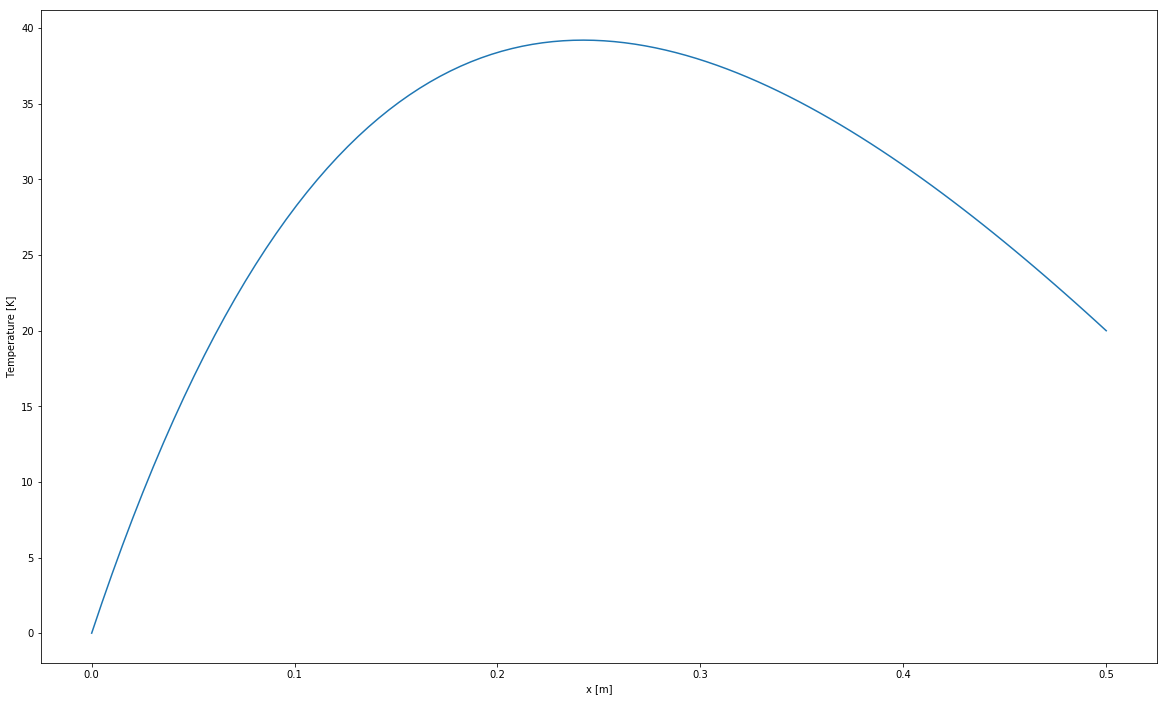

In [5]:

print('Number of Iterations it took:' + str(iterations))
print('Epsilon: ' + str(eps))
print('The Temperature Profile is:')
print(array)

plt.plot(x, array)
plt.ylabel('Temperature [K]')
plt.xlabel('x [m]')
plt.show()

# Grid Refinement Studey

In [ ]:
# constants
l = 0.5
a = 5
k = 1.28
t_0 = 20
c = 3767

for x_grid in range(10,300, 10):
    # space grid definition
    dx = l/x_grid
    x = np.linspace(0,l,x_grid)
    # heat generation term
    q = c * np.exp(-a * x)

    heat_gen = [(qx*(dx**2))/(2*k) for qx in q]
    array = np.ndarray(shape=(x_grid), dtype=float)
    oldarray = array

    for i in range(0,x_grid):
        array[i] = 0
        oldarray[i] = 0 

    # boundary conditions
    array[0] = 0
    array[-1] = t_0

    eps =1000
    iterations = 0
    # run loop while eps is small (converges)
    while eps > 0.05:
        iterations += 1
        for space in range(1, x_grid-1):
            array[space] = ((array[space - 1] + array[space + 1])/2) + heat_gen[space]
        eps = abs(40-max(array))/max(array)
        oldarray = array
    
    
    plt.plot(x, array, label='dx [m] = ' + str(dx))

plt.ylabel('Temperature [K]')
plt.xlabel('x [m]')
plt.legend()
plt.show()

# Numerical Solution - Finite Difference Method
$\frac{1}{\alpha} \cdot \frac{\partial T}{\partial t} = \frac{\partial ^2 T}{\partial x^2}$

Becomes:

$ \frac{1}{\alpha} \cdot \frac{T_k^i-T_k^{i-1}}{\Delta t} = \frac{T_{k-1}^i - 2T_k^i + T_{k+1}^i}{ (\Delta x)^2}$

In [ ]:
#material properties of concrete
#density = 2400kg per cubic meter
rho = 2400
# specific heat = 960 J/kgK for light concrete
c_p = 960
alpha = k/(rho*c_p)
# space grid definition
x_grid = 100
dx = l/x_grid
x = np.linspace(0,l,x_grid)

# time grid definition
t_grid = 100
max_time = 1000
dt = max_time / t_grid
t = np.linspace(0, max_time, t_grid)

# define epsilon
eps = 10000

# random 2d array with x_grid * t_grid
array = np.ndarray(shape=(x_grid,t_grid), dtype=float)
oldarray = np.ndarray(shape=(x_grid, t_grid), dtype=float)

# set t = 0 values -> array[0,:]
for i in range(0, x_grid):
    x = dx * i
    array[0,i] =-(c*np.exp(-a*x)/((a**2)*k))+(x/l)*(t_0 - (c*(1-np.exp(-a*l)))/((a**2)*k))+(c/((a**2)*k)) + 273

# boundary conditions -> array[:,0] for x=0 //// array[:,-1] for x=l
for i in range(0, t_grid):
    array[i,0] = 0
    array[i,-1] = 293

oldarray = array
iterations = 0
# run loop until eps is small (converges)
while eps > 0.01:
    iterations += 1
    for timestep in range(1, t_grid-1):
        for space in range(1, x_grid-1):
            array[space, timestep] = (1/alpha * array[space, timestep-1]/dt + array[space-1, timestep]/(dx**2) + array[space+1, timestep]/(dx**2))/(1/(alpha*dt) + 2/(dx**2))
    eps = abs(np.sum(np.subtract(array, oldarray)))
    print(eps)
    oldarray = array

print(array)
print(iterations)
